This notebook covers images, maipluating images and convolution.

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
# Sample image 
#!wget --output-document /data/sample_img.png https://ibm.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png

Image shape: (768, 1024, 3)


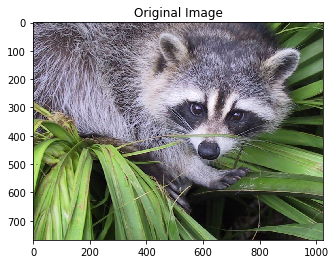

In [3]:
#%matplotlib inline

f = misc.face()
gray_f = np.dot(f[...,:3], [0.299, 0.587, 0.114])
plt.imshow(f)
plt.title("Original Image")
print("Image shape: {}".format(f.shape))
plt.show()

Grayscale image shape: (768, 1024)


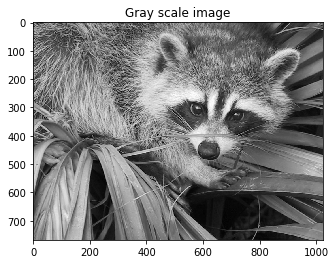

In [4]:
plt.imshow(gray_f,cmap=plt.get_cmap("gray"))
plt.title("Gray scale image")
print("Grayscale image shape: {}".format(gray_f.shape))
plt.show()

When performing convolution on images in tensorflow, the data passed is expected to have * Shape = [Batch_size, Height, Width, Channels] *   
Note the number of channels is three for rgb and one for grayscale. This means we will need to 'expand dimensions' for grayscale (or and singlechannel images) and for individual images. (Twice for individual single-channel images)

In [5]:
Image = np.expand_dims(np.expand_dims(gray_f,0),-1)
print(Image.shape)

(1, 768, 1024, 1)


Out image is now ready to be passed to tensorflow for colvolution. First we want to create a placeholer of the same shap as our data will be then we will be ready to set up our colvolution graph

In [6]:
batch_size = 1
input_dat = tf.placeholder(tf.float32,[batch_size,768,1024,1])

Our weight tensor is expected to be of the shape: * [filter_height, filter_width, in_channels, out_channels] *

In [7]:
filter_shape = [6, 6, 1, 1]
W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1),name="W")


In [8]:
CONV = tf.nn.conv2d(input=input_dat,
                         filter=W,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

In [9]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

In [10]:
result = sess.run(CONV,feed_dict={input_dat:Image})
print(result.shape)

(1, 768, 1024, 1)


In [11]:
vec = np.reshape(result, (1, -1))
out_image= np.reshape(vec,(768,1024))
print(out_image.shape)

(768, 1024)


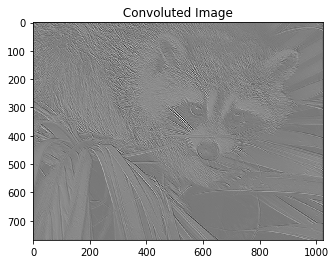

In [12]:
plt.imshow(out_image,cmap=plt.get_cmap("gray"))
plt.title(" Convoluted Image ")
plt.show()

We can see the image get lightly blurred from convolution, and will come out slightly different each time as the operations are based upon random weights, with no learning implamented yet. 

After convolution, data is passsed through an activation function, and then to a * pooling * layer.  
Pooling reduces the number of features and should act to highlight the important ones.  
Typically each layer in a deep convolutional neural network repeates this pattern: * convolution, activation, pooling *



In [13]:
def Conv2d(X,W):
    return tf.nn.conv2d(input=X,filter=W,strides=[1, 1, 1, 1],padding='SAME')

def MaxPool(X):
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [14]:
weights = {
    'W_conv1': tf.Variable(tf.random_normal([5, 5, 1, 32]))}
bias = {
    'b_conv1': tf.Variable(tf.random_normal([32]))}

In [15]:
conv1 = tf.nn.relu(Conv2d(input_dat, weights['W_conv1']) + bias['b_conv1'])

pooled = MaxPool(conv1)

    
print(conv1.get_shape().as_list())

print(pooled.get_shape().as_list())
output_shape = pooled.get_shape().as_list()[1:]

[1, 768, 1024, 32]
[1, 384, 512, 32]


In [16]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

In [17]:
Out = sess.run(pooled,feed_dict={input_dat:Image})

In [18]:
import matplotlib.animation
matplotlib.rc('animation', html='html5')

print(Out.shape)

vec = np.reshape(Out, output_shape);
print(vec.shape)
def plot_image(out_data,output_shape):
    num_steps = output_shape[-1]
    fig = plt.figure(figsize = (5,5))
    ax = plt.subplot(1,1,1)
    def animate(i):
        im = ax.imshow(vec[:,:,i],cmap=plt.get_cmap("gray"))
        return im,
    return matplotlib.animation.FuncAnimation(fig, animate, frames=range(0,output_shape[-1]), interval=500, blit=True)
    #print image
    #image *= 255.0/image.max() 
    #print image

(1, 384, 512, 32)
(384, 512, 32)


In [19]:
plot_image(vec,output_shape)

We see a range of effects producing images that appear very similar to the original and others that only contain a few edges. This is colvolution in effect, without learning implemented.